# Load data

In [1]:
from utils import load_data
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

df = load_data(separate=False)
df_stock_only = df[['AIR_STOCK','NASDAQ', 'DOW', 'ARR_DEL15']]


# get the string columns
cat_cols = df.drop(columns=['ARR_DEL15', 'DISTANCE', 'NASDAQ', 'DOW', 'AIR_STOCK']).columns.tolist()


# Fit and transform the encoder on the selected columns
encoder = OrdinalEncoder()
encoded_cols = encoder.fit_transform(df[cat_cols])

# Convert the encoded columns to a DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=cat_cols)

# Drop the original columns from the DataFrame
df = df.drop(columns=cat_cols)

# Concatenate the encoded columns with the remaining columns
df = pd.concat([df, encoded_df], axis=1)

df

,ARR_DEL15,DISTANCE,NASDAQ,DOW,AIR_STOCK,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,...,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME
0,0.0,1158.0,6847.589844,570.89,49.000000,0.0,0.0,4.0,0.0,115.0,...,17.0,80.0,41.0,40.0,279.0,275.0,267.0,44.0,19.0,298.0
1,0.0,1158.0,6847.589844,570.89,49.000000,0.0,0.0,4.0,0.0,115.0,...,275.0,267.0,44.0,19.0,93.0,17.0,80.0,41.0,40.0,578.0
2,0.0,918.0,6847.589844,570.89,49.000000,0.0,0.0,4.0,0.0,115.0,...,17.0,80.0,41.0,40.0,169.0,94.0,153.0,7.0,14.0,783.0
3,0.0,918.0,6847.589844,570.89,49.000000,0.0,0.0,4.0,0.0,115.0,...,94.0,153.0,7.0,14.0,93.0,17.0,80.0,41.0,40.0,1038.0
4,0.0,1021.0,6847.589844,570.89,49.000000,0.0,0.0,4.0,0.0,116.0,...,55.0,66.0,33.0,24.0,93.0,17.0,80.0,41.0,40.0,558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345612,1.0,353.0,15741.559570,465.45,42.720001,4.0,28.0,3.0,9.0,5863.0,...,187.0,186.0,4.0,49.0,231.0,177.0,229.0,4.0,49.0,768.0
1345613,1.0,650.0,15741.559570,465.45,42.720001,4.0,28.0,3.0,9.0,5863.0,...,211.0,161.0,23.0,33.0,23.0,33.0,22.0,41.0,40.0,498.0
1345614,1.0,353.0,15741.559570,465.45,42.720001,4.0,28.0,3.0,9.0,5863.0,...,177.0,229.0,4.0,49.0,192.0,187.0,186.0,4.0,49.0,888.0
1345615,1.0,353.0,15741.559570,465.45,42.720001,4.0,28.0,3.0,9.0,5863.0,...,187.0,186.0,4.0,49.0,231.0,177.0,229.0,4.0,49.0,1008.0


# Make balanced classes

In [ ]:
import pandas as pd
# Determine the class with the fewer samples.
counts = df_stock_only['ARR_DEL15'].value_counts()
minority_class = counts.idxmin()
minority_count = counts[minority_class]

# Select a random sample of the larger class with the same size as the smaller class.
majority_class = 1 - minority_class
majority_count = counts[majority_class]
majority_sample = df_stock_only[df_stock_only['ARR_DEL15'] == majority_class].sample(n=minority_count, random_state=0)

# Combine the two classes into a single DataFrame.
minority_df = df_stock_only[df_stock_only['ARR_DEL15'] == minority_class]
balanced_df_stock_only = pd.concat([minority_df, majority_sample], axis=0)

minority_df = df[df['ARR_DEL15'] == minority_class]
majority_sample = df[df['ARR_DEL15'] == majority_class].sample(n=minority_count, random_state=0)
balanced_df = pd.concat([minority_df, majority_sample], axis=0)

balanced_df

# 25%

In [12]:
sample_size = int(len(df) * 0.25)

# Use the sample method to randomly select rows from the original dataframe
df_sample = df.sample(n=sample_size, random_state=0)

df_sample

,ARR_DEL15,DISTANCE,NASDAQ,DOW,AIR_STOCK,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,...,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME
565692,0.0,765.0,8567.990234,469.63,56.750000,2.0,1.0,0.0,3.0,5432.0,...,31.0,14.0,47.0,25.0,20.0,30.0,19.0,8.0,15.0,218.0
1252944,0.0,1005.0,15341.089844,459.42,14.520000,4.0,20.0,1.0,2.0,3100.0,...,210.0,319.0,7.0,14.0,170.0,132.0,220.0,30.0,12.0,460.0
1225121,0.0,1010.0,15169.679688,451.99,36.560001,4.0,16.0,4.0,3.0,1368.0,...,132.0,220.0,30.0,12.0,332.0,210.0,319.0,7.0,14.0,528.0
641274,0.0,571.0,8621.830078,475.67,67.989998,2.0,8.0,0.0,1.0,3110.0,...,26.0,13.0,1.0,0.0,173.0,182.0,157.0,1.0,0.0,1233.0
423273,0.0,328.0,6753.729980,494.69,32.040001,1.0,16.0,0.0,0.0,3153.0,...,86.0,58.0,31.0,17.0,169.0,94.0,153.0,7.0,14.0,654.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853310,0.0,452.0,9006.620117,496.91,54.320000,2.0,25.0,4.0,9.0,961.0,...,71.0,24.0,18.0,16.0,272.0,268.0,253.0,17.0,6.0,1198.0
714683,0.0,395.0,8734.879883,481.04,54.150002,2.0,12.0,4.0,9.0,3845.0,...,59.0,218.0,40.0,29.0,206.0,78.0,62.0,11.0,21.0,1178.0
735909,1.0,944.0,8823.360352,488.25,18.969999,2.0,16.0,1.0,2.0,2823.0,...,112.0,235.0,7.0,14.0,170.0,132.0,220.0,30.0,12.0,377.0
867977,0.0,533.0,8945.990234,495.32,87.959999,2.0,28.0,0.0,8.0,2427.0,...,27.0,85.0,5.0,42.0,202.0,211.0,161.0,23.0,33.0,523.0


# Stock only

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(balanced_df_stock_only.drop(columns=['ARR_DEL15']), balanced_df_stock_only['ARR_DEL15'], test_size=0.2, stratify=balanced_df_stock_only['ARR_DEL15'], random_state=0)

## Regular decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [i for i in range(1,25 ,1)]}

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best depth found by the grid search
print("Best depth:", grid_search.best_params_['max_depth'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, PrecisionRecallDisplay

# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth = grid_search.best_params_['max_depth'])
# clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
  
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print('Tree Depth: ', clf.get_depth())
print('Number of leaves: ', clf.get_n_leaves())
print('Accuracy:', accuracy)

# print the report
print(classification_report(y_test, y_pred))

display = PrecisionRecallDisplay.from_predictions(y_test, y_pred)
_ = display.ax_.set_title("Precision-Recall curve")

In [ ]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a random forest classifier object
rf = RandomForestClassifier(n_estimators = 1000, n_jobs=-1, verbose=2, random_state=0)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


## Gradient boosted tree

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Instantiate the model with default hyperparameters
gbc = HistGradientBoostingClassifier(max_iter = 10000, verbose=1, n_iter_no_change = 100, random_state=0)

# Fit the model to the training data
gbc.fit(X_train, y_train)

# Predict on the test data
y_pred = gbc.predict(X_test)

# Evaluate the performance of the model
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# All data

In [13]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(balanced_df.drop(columns=['ARR_DEL15']), balanced_df['ARR_DEL15'], test_size=0.2, stratify=balanced_df['ARR_DEL15'], random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['ARR_DEL15']), df['ARR_DEL15'], test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(df_sample.drop(columns=['ARR_DEL15']), df_sample['ARR_DEL15'], test_size=0.2, random_state=0)

## Regular decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [i for i in range(1,46)]}

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best depth found by the grid search
print("Best depth:", grid_search.best_params_['max_depth'])

Tree Depth:  14
Number of leaves:  5289
Accuracy: 0.8079398344257666
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89     54420
         1.0       0.49      0.18      0.27     12861

    accuracy                           0.81     67281
   macro avg       0.66      0.57      0.58     67281
weighted avg       0.77      0.81      0.77     67281



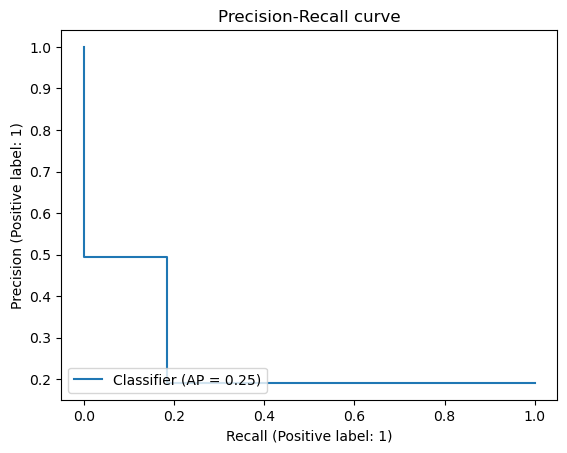

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, PrecisionRecallDisplay

# Train the decision tree classifier
# clf = DecisionTreeClassifier(max_depth = grid_search.best_params_['max_depth'])
clf = DecisionTreeClassifier(max_depth=14)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
  
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print('Tree Depth: ', clf.get_depth())
print('Number of leaves: ', clf.get_n_leaves())
print('Accuracy:', accuracy)

# print the report
print(classification_report(y_test, y_pred))

display = PrecisionRecallDisplay.from_predictions(y_test, y_pred)
_ = display.ax_.set_title("Precision-Recall curve")

In [ ]:
import matplotlib.pyplot as plt
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

## Random forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a random forest classifier object
rf = RandomForestClassifier(n_estimators = 100, n_jobs=-1, verbose=2, random_state=0)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.7s


building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    2.9s finished


Accuracy Score: 0.8361758891811952
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.91    217988
         1.0       0.67      0.27      0.39     51136

    accuracy                           0.84    269124
   macro avg       0.76      0.62      0.65    269124
weighted avg       0.82      0.84      0.81    269124



## Gradient boosted tree

In [15]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Instantiate the model with default hyperparameters
gbc = HistGradientBoostingClassifier(max_iter = 10000, verbose=1, n_iter_no_change = 100, random_state=0)

# Fit the model to the training data
gbc.fit(X_train, y_train)

# Predict on the test data
y_pred = gbc.predict(X_test)

# Evaluate the performance of the model
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Binning 0.041 GB of training data: 0.357 s
Binning 0.005 GB of validation data: 0.004 s
Fitting gradient boosted rounds:
[1/10000] 1 tree, 31 leaves, max depth = 9, train loss: 0.48073, val loss: 0.48079, in 0.026s
[2/10000] 1 tree, 31 leaves, max depth = 10, train loss: 0.47576, val loss: 0.47591, in 0.025s
[3/10000] 1 tree, 31 leaves, max depth = 8, train loss: 0.47188, val loss: 0.47211, in 0.022s
[4/10000] 1 tree, 31 leaves, max depth = 10, train loss: 0.46857, val loss: 0.46883, in 0.023s
[5/10000] 1 tree, 31 leaves, max depth = 8, train loss: 0.46577, val loss: 0.46609, in 0.021s
[6/10000] 1 tree, 31 leaves, max depth = 8, train loss: 0.46335, val loss: 0.46380, in 0.023s
[7/10000] 1 tree, 31 leaves, max depth = 10, train loss: 0.46126, val loss: 0.46182, in 0.022s
[8/10000] 1 tree, 31 leaves, max depth = 8, train loss: 0.45914, val loss: 0.45972, in 0.024s
[9/10000] 1 tree, 31 leaves, max depth = 10, train loss: 0.45735, val loss: 0.45812, in 0.023s
[10/10000] 1 tree, 31 leaves,